#Cerinta 1

In [20]:
# Importam librariile necesare: pandas pentru manipularea datelor si seaborn pentru vizualizare.
import pandas as pd
import seaborn as sns
# Citim datele dintr-un fisier CSV si le incarcam intr-un DataFrame.
data = pd.read_csv('./train.csv')
# Obtinem si afisam informatii despre DataFrame, inclusiv numele coloanelor, tipurile de date si numarul de valori nenule.
data_types = data.info()
print(data_types)
# Calculam si afisam numarul de valori lipsa (NaN) pentru fiecare coloana din DataFrame.
missing_values = data.isnull().sum()
print(missing_values)
# Verificam daca exista duplicate in DataFrame si afisam numarul acestora.
has_duplicates = data.duplicated().sum()
print("Numarul duplicatelor este: ", has_duplicates)
# Calculam si afisam numarul total de randuri din DataFrame.
num_rows = len(data)
print("Numarul total de linii este: ", num_rows)
# Calculam si afisam numarul total de coloane din DataFrame.
num_columns = len(data.columns)
print("Numarul de coloane cu date este: ", num_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

#Cerinta 2

Procentul de supravietuire:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64
Distributia pe clase:
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64
Distributia pe sexe:
Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64


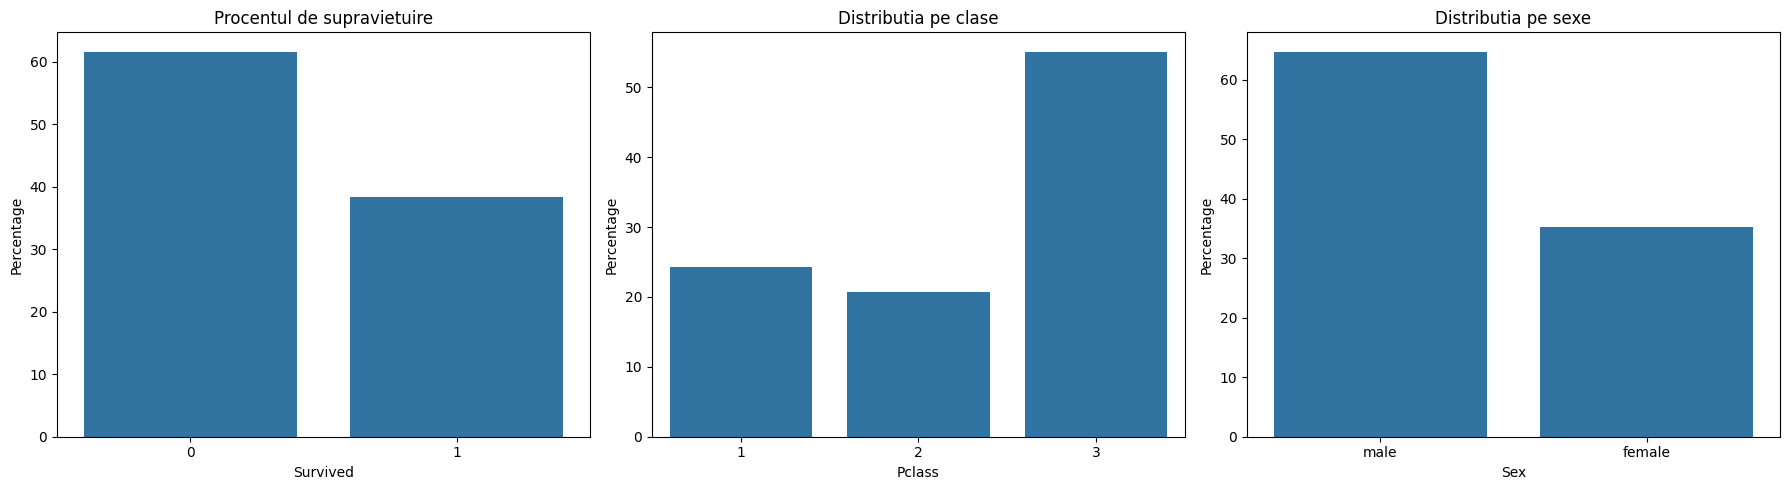

In [3]:
# Calculam procentul persoanelor care au supravietuit si care nu au supravietuit
survival_rate = data['Survived'].value_counts(normalize=True) * 100
print(f'Procentul de supravietuire:\n{survival_rate}')
# Calculam procentul pasagerilor pentru fiecare tip de clasa
class_distribution = data['Pclass'].value_counts(normalize=True) * 100
print(f'Distributia pe clase:\n{class_distribution}')
# Calculam procentul barbatilor si femeilor
gender_distribution = data['Sex'].value_counts(normalize=True) * 100
print(f'Distributia pe sexe:\n{gender_distribution}')
# Importam librariile necesare pentru vizualizare: matplotlib si seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# Cream grafice pentru procentul de supravietuire, distributia pe clase si distributia pe sexe
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Graficul pentru procentul de supravietuire
sns.barplot(x=survival_rate.index, y=survival_rate.values, ax=axes[0])
axes[0].set_title('Procentul de supravietuire')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Percentage')
# Graficul pentru distributia pe clase
sns.barplot(x=class_distribution.index, y=class_distribution.values, ax=axes[1])
axes[1].set_title('Distributia pe clase')
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Percentage')
# Graficul pentru distributia pe sexe
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, ax=axes[2])
axes[2].set_title('Distributia pe sexe')
axes[2].set_xlabel('Sex')
axes[2].set_ylabel('Percentage')
# Ajustam aspectul layout-ului si afisam graficele
plt.tight_layout()
plt.show()


#Cerinta 3

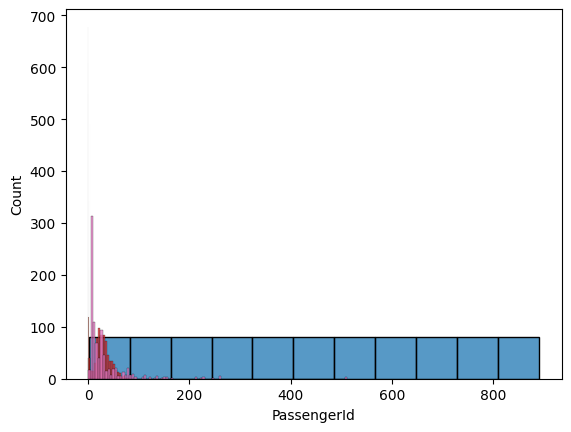

In [4]:
# Selectam coloanele numerice din DataFrame
numeric_columns = data.select_dtypes(include='number').columns
# Pentru fiecare coloana numerica, cream un histogram folosind seaborn
for column in numeric_columns:
    sns.histplot(data=data, x=column)

#Cerinta 4

In [12]:
# Selectam coloanele care au valori lipsa
missing_columns = data.columns[data.isnull().any()]
# Determinam numarul si proportia valorilor lipsa
missing_data = data[missing_columns].isnull().sum()
missing_percentage = (missing_data / num_rows) * 100
# Afisam numarul si proportia valorilor lipsa pentru fiecare coloana
print(pd.DataFrame({'Numarul valorilor lipsa': missing_data, 'Procentaj': missing_percentage}))
# Calculam procentul valorilor lipsa pentru fiecare clasa (Survived)
missing_by_survival = data.groupby('Survived')[missing_columns].apply(lambda x: x.isnull().sum() / len(x) * 100)
# Afisam procentul valorilor lipsa pentru fiecare clasa (Survived)
print(f'\nProcentul valorilor lipsa pe clase:\n{missing_by_survival}')


          Numarul valorilor lipsa  Procentaj
Age                           177  19.865320
Cabin                         687  77.104377
Embarked                        2   0.224467

Procentul valorilor lipsa pe clase:
                Age      Cabin  Embarked
Survived                                
0         22.768670  87.613843  0.000000
1         15.204678  60.233918  0.584795


#Cerinta 5

Numarul de pasageri pe categorii de varsta:
Age Category
[21, 40]     385
[0, 20]      179
[41, 60]     128
[61, max]     22
Name: count, dtype: int64


<Axes: xlabel='Age Category'>

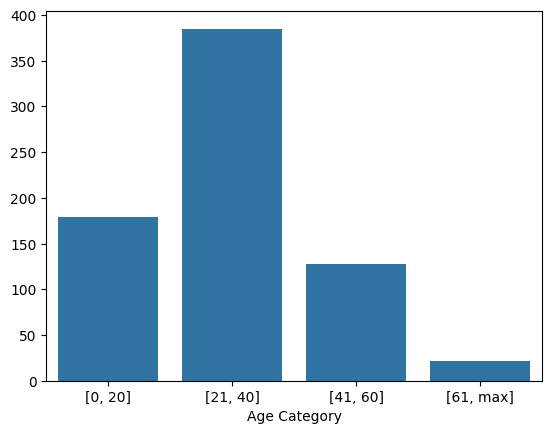

In [14]:
# Impartim varstele in categorii folosind pd.cut si specificam limitele intervalelor
age_categories = pd.cut(data['Age'], bins=[0, 20, 40, 60, data['Age'].max()], labels=['[0, 20]', '[21, 40]', '[41, 60]', '[61, max]'])
# Adaugam noua coloana 'Age Category' in DataFrame-ul initial
data['Age Category'] = age_categories
# Calculam numarul de pasageri pentru fiecare categorie de varsta
passengers_per_category = data['Age Category'].value_counts()
# Afisam numarul de pasageri pentru fiecare categorie de varsta
print(f'Numarul de pasageri pe categorii de varsta:\n{passengers_per_category}')
# Cream un grafic barplot pentru a vizualiza distributia pasagerilor pe categorii de varsta
sns.barplot(x=passengers_per_category.index, y=passengers_per_category.values)

#Cerinta 6

Numarul de barbati care au supravietuit in fiecare categorie de varsta:
Age Category
[0, 20]      29
[21, 40]     46
[41, 60]     16
[61, max]     2
Name: Survived, dtype: int64


/var/folders/qm/qw7v05t91gbc3d_lfk2d2svh0000gn/T/ipykernel_46899/2681800649.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  male_survival_by_age_category = data[data['Sex'] == 'male'].groupby('Age Category')['Survived'].sum()


<Axes: xlabel='Age Category'>

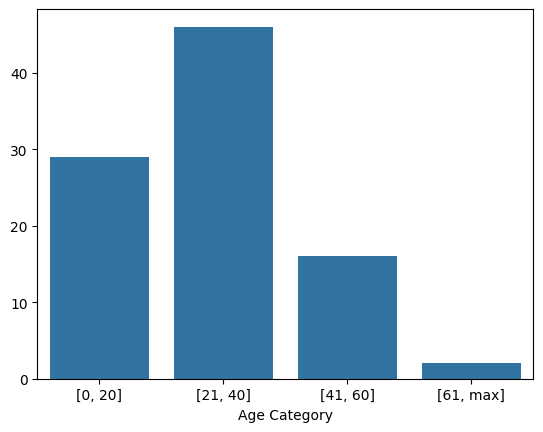

In [16]:
# Calculam numarul de barbati care au supravietuit in fiecare categorie de varsta
male_survival_by_age_category = data[data['Sex'] == 'male'].groupby('Age Category')['Survived'].sum()
# Afisam numarul de barbati care au supravietuit in fiecare categorie de varsta
print(f'Numarul de barbati care au supravietuit in fiecare categorie de varsta:\n{male_survival_by_age_category}')
# Cream un grafic barplot pentru a vizualiza numarul de barbati care au supravietuit in fiecare categorie de varsta
sns.barplot(x=male_survival_by_age_category.index, y=male_survival_by_age_category.values)

#Cerinta 7

Procentul de copii: 12.68%


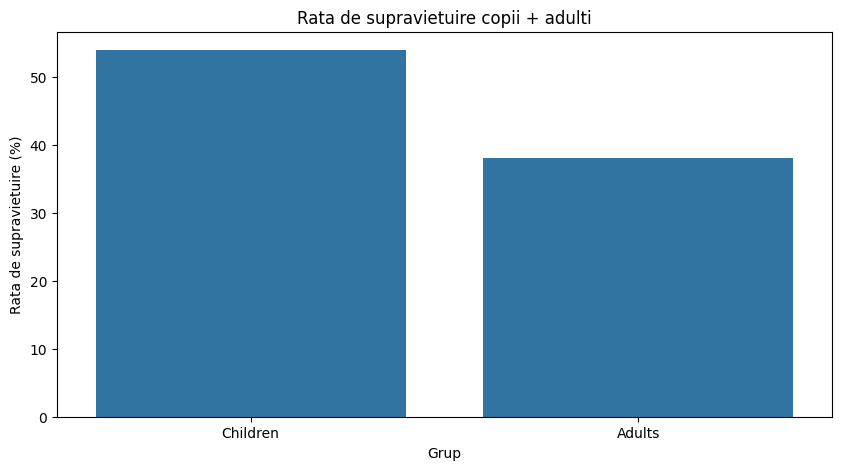

In [17]:
# Citim datele dintr-un fisier CSV si le incarcam intr-un DataFrame
data = pd.read_csv('./train.csv')
# Calculam numarul total de randuri din DataFrame
num_rows = len(data)
# Filtram datele pentru a obtine doar copiii (persoanele cu varsta sub 18 ani)
children_number = data[data['Age'] < 18]
# Calculam procentul de copii din totalul pasagerilor
children_survival_rate = len(children_number) / num_rows * 100
print(f"Procentul de copii: {children_survival_rate:.2f}%")
# Calculam rata de supravietuire pentru copii (procentul copiilor care au supravietuit)
children_survival_rate = data[data['Age'] < 18]['Survived'].mean() * 100
# Calculam rata de supravietuire pentru adulti (procentul adultilor care au supravietuit)
adults_survival_rate = data[data['Age'] >= 18]['Survived'].mean() * 100
# Cream o figura pentru graficul barplot
plt.figure(figsize=(10, 5))
# Cream un grafic barplot pentru a compara rata de supravietuire a copiilor si adultilor
sns.barplot(x=['Children', 'Adults'], y=[children_survival_rate, adults_survival_rate])
# Adaugam titlul si etichetele axelor
plt.title('Rata de supravietuire copii + adulti')
plt.xlabel('Grup')
plt.ylabel('Rata de supravietuire (%)')
# Afisam graficul
plt.show()

#Cerinta 9

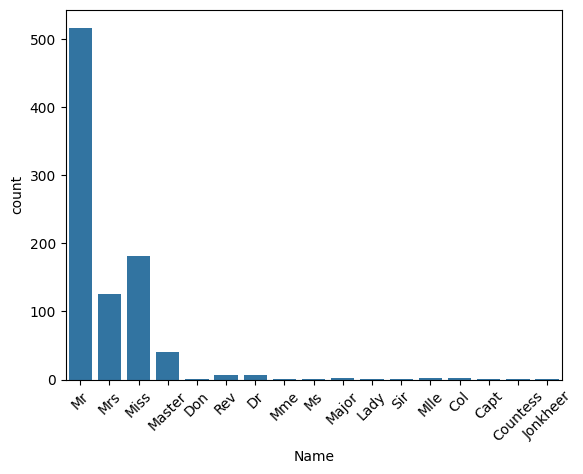

In [18]:
# Extragem titlurile din numele pasagerilor folosind expresii regulate
# Titlurile sunt cuvinte care apar inainte de punct (ex: Mr., Mrs., etc.)
titles = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Cream un tabel de frecventa care arata numarul de aparitii ale fiecarui titlu in functie de sex
title_gender_match = pd.crosstab(titles, data['Sex'])
# Cream un grafic de tip countplot pentru a vizualiza distributia titlurilor
sns.countplot(x=titles)
# Rotim etichetele de pe axa X pentru a le face mai usor de citit
plt.xticks(rotation=45)
# Afisam graficul
plt.show()

#Cerinta 10

/Users/edi/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/edi/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/edi/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


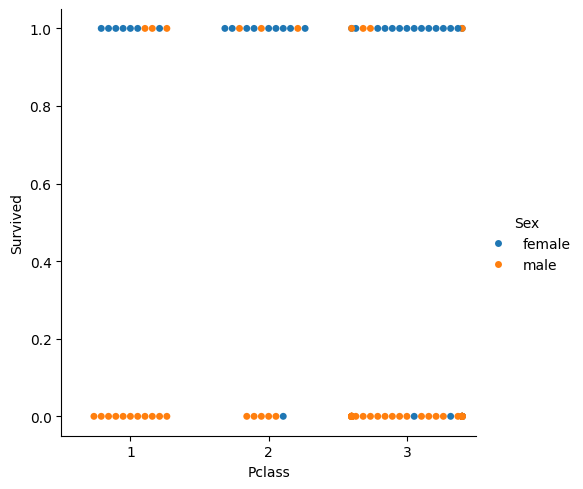

In [19]:
# Selectam primele 100 de randuri din DataFrame pentru a crea un subset de date
subset = data.head(100)
# Cream un grafic de tip swarm plot pentru a vizualiza relatia dintre clasa pasagerilor (Pclass) si rata de supravietuire (Survived)
# Datele sunt colorate in functie de sex (hue='Sex')
sns.catplot(data=subset, x='Pclass', y='Survived', hue='Sex', kind='swarm')